In [1]:
import geopandas as gpd 
import os
from dotenv import load_dotenv
load_dotenv()

/media/veracrypt1/.virtualenvs/WRI_India_ext-hyHLP5Re/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


True

In [2]:
# Import the voronoi shape of India
import dssg.dataio.osm_to_voronoi_mapping as ovm
data_dir = os.environ.get("DATA_DIR")
india_voronoi_gpd = gpd.read_file(data_dir + "voronoi3_clip/voronoi3_clip.shp")

In [3]:
india_voronoi_gpd.head()

,DHSID,DHSCC,DHSYEAR,DHSCLUST,LATNUM,LONGNUM,GID_2c,geometry
0,IA201400010205,IA,2014.0,10205.0,6.982919,93.896888,IND.1.1_1,"POLYGON ((93.92154 6.99060, 93.92162 6.99049, ..."
1,IA201400010113,IA,2014.0,10113.0,6.989290,93.891761,IND.1.1_1,"POLYGON ((93.76692 6.89938, 93.76698 6.89975, ..."
2,IA201400010183,IA,2014.0,10183.0,6.968333,93.904450,IND.1.1_1,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
3,IA201400010078,IA,2014.0,10078.0,7.005433,93.900401,IND.1.1_1,"POLYGON ((93.91862 7.00697, 93.91672 7.00529, ..."
4,IA201400010147,IA,2014.0,10147.0,7.008453,93.941767,IND.1.1_1,"MULTIPOLYGON (((93.93788 7.01192, 93.93806 7.0..."


In [4]:
import dssg.dataio.osm_data_extraction as ode
india_shape = os.environ.get("DATA_DIR") + "/gadm36_shp/gadm36_IND_2.shp"

In [5]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_district_dataframe
import matplotlib.pyplot as plt 
%matplotlib inline
india_gpd = gpd.read_file(india_shape)
#Extract a district from gadm36_IND_2.shp file
araria_gdf = ode.extract_district_dataframe(india_gpd, 'Araria')

 
*** Profile printout saved to text file '../profile/extract_district_dataframe'. 


In [6]:
print(open('../profile/extract_district_dataframe', 'r').read())

         65845 function calls (62208 primitive calls) in 0.973 seconds

   Ordered by: cumulative time
   List reduced from 712 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.973    0.973 {built-in method builtins.exec}
        1    0.000    0.000    0.972    0.972 <string>:1(<module>)
        1    0.001    0.001    0.937    0.937 file.py:66(_read_file)
        1    0.315    0.315    0.866    0.866 geodataframe.py:505(from_features)
        3    0.000    0.000    0.444    0.148 geodataframe.py:103(__init__)
       12    0.000    0.000    0.376    0.031 geodataframe.py:25(_ensure_geometry)
        1    0.000    0.000    0.376    0.376 array.py:152(from_shapely)
        1    0.003    0.003    0.362    0.362 _vectorized.py:93(from_shapely)
      666    0.002    0.000    0.358    0.001 _vectorized.py:78(_shapely_to_pygeos)
      666    0.235    0.000    0.238    0.000 io.py:184(from_wkb)


In [7]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_district_voronoi_clipped
#Extract the GeoDataFrame of the voronoi clipped to the district boundary
araria_voronoi_gpd_clipped = ovm.extract_district_voronoi_clipped(india_voronoi_gpd, araria_gdf)

 
*** Profile printout saved to text file '../profile/extract_district_voronoi_clipped'. 


In [8]:
print(open('../profile/extract_district_voronoi_clipped', 'r').read())

         46112740 function calls (45340952 primitive calls) in 55.059 seconds

   Ordered by: cumulative time
   List reduced from 1488 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      3/1    0.000    0.000   55.059   55.059 {built-in method builtins.exec}
        1    0.027    0.027   55.059   55.059 <string>:2(<module>)
        1    0.001    0.001   55.011   55.011 osm_to_voronoi_mapping.py:43(extract_district_voronoi_clipped)
        1    0.042    0.042   54.609   54.609 osm_data_extraction.py:56(create_district_knots_and_edges_model)
        1    0.319    0.319   54.559   54.559 graph.py:354(graph_from_polygon)
        2    0.036    0.018   33.596   16.798 truncate.py:120(truncate_graph_polygon)
        2    0.022    0.011   18.137    9.069 utils_geo.py:339(_intersect_index_quadrats)
      629    0.024    0.000   16.274    0.026 geodataframe.py:103(__init__)
      633    0.016    0.000   15.775    0.025 geodataframe.py:201

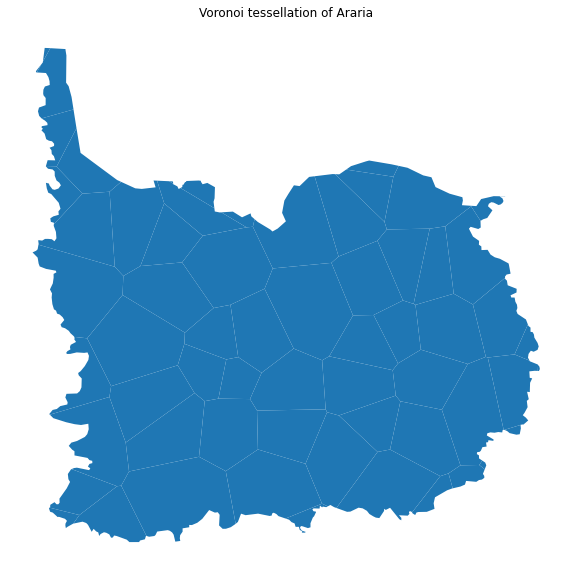

In [9]:
ovm.plot_district_voronoi(araria_voronoi_gpd_clipped, "Araria")

In [10]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_district_voronoi_wo_clipping
araria_voronoi_joined = ovm.extract_district_voronoi_wo_clipping(india_voronoi_gpd, araria_gdf)

 
*** Profile printout saved to text file '../profile/extract_district_voronoi_wo_clipping'. 


In [11]:
print(open('../profile/extract_district_voronoi_wo_clipping', 'r').read())

         23295 function calls (22961 primitive calls) in 0.462 seconds

   Ordered by: cumulative time
   List reduced from 664 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.462    0.462 {built-in method builtins.exec}
        1    0.000    0.000    0.462    0.462 <string>:1(<module>)
        1    0.000    0.000    0.462    0.462 osm_to_voronoi_mapping.py:68(extract_district_voronoi_wo_clipping)
        1    0.004    0.004    0.462    0.462 sjoin.py:9(sjoin)
        1    0.002    0.002    0.389    0.389 sjoin.py:198(_frame_join)
        2    0.000    0.000    0.235    0.117 geodataframe.py:1328(merge)
        2    0.000    0.000    0.235    0.117 frame.py:8176(merge)
        2    0.000    0.000    0.235    0.117 merge.py:57(merge)
        2    0.000    0.000    0.234    0.117 merge.py:680(get_result)
        2    0.000    0.000    0.180    0.090 merge.py:891(_get_join_info)


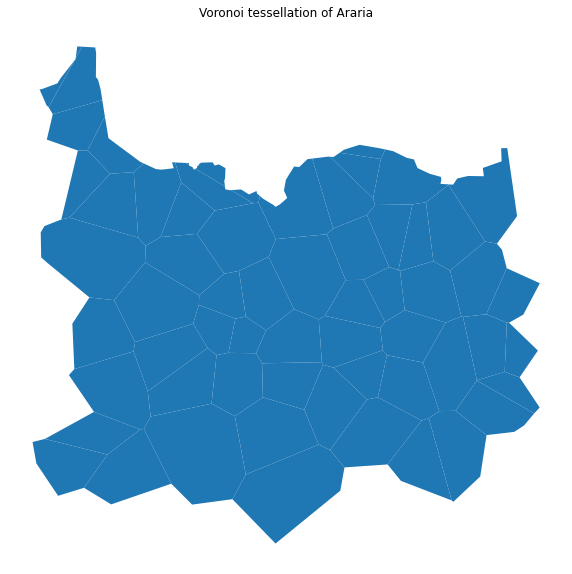

In [12]:
ovm.plot_district_voronoi(araria_voronoi_joined, "Araria")

In [13]:
#Read in the predictions for araria:
araria_pred_file = os.environ.get("OSM_DIR") + "/araria_results_scaled.csv" 
import pandas as pd 
araria_pred = pd.read_csv(araria_pred_file)

In [14]:
araria_pred = araria_pred.drop('geometry', axis=1)

In [15]:
araria_pred.head()

,preds,real,DHSCLUST,DHSID,dif
0,4.693452,4.693452,51698.0,IA201400051698,-0.000277
1,4.693452,4.693452,50932.0,IA201400050932,-0.000146
2,4.693452,4.693452,51675.0,IA201400051675,-0.000272
3,4.693452,4.693452,50454.0,IA201400050454,-0.000217
4,4.693452,4.693452,51032.0,IA201400051032,-0.000203


In [16]:
araria_voronoi_joined.head()

,DHSID,DHSCC,DHSYEAR,DHSCLUST,LATNUM,LONGNUM,GID_2c,geometry,index_right,NAME_2
17755,IA201400051360,IA,2014.0,51360.0,25.970394,87.609532,IND.5.28_1,"POLYGON ((87.60880 25.90716, 87.60629 25.90924...",61,Araria
17778,IA201400050339,IA,2014.0,50339.0,25.933296,87.105385,IND.5.28_1,"POLYGON ((87.09796 25.90330, 87.05747 25.92808...",61,Araria
17794,IA201400050454,IA,2014.0,50454.0,25.974947,87.046211,IND.5.19_1,"POLYGON ((87.01873 25.91611, 86.98627 25.96456...",61,Araria
17804,IA201400051481,IA,2014.0,51481.0,25.960001,87.572028,IND.5.28_1,"POLYGON ((87.60629 25.90924, 87.53056 25.93841...",61,Araria
17812,IA201400050618,IA,2014.0,50618.0,25.924805,87.375620,IND.5.28_1,"POLYGON ((87.34338 25.84484, 87.27898 25.91104...",61,Araria


In [17]:
araria_pred.shape, araria_voronoi_joined.shape

((58, 5), (60, 10))

In [18]:
araria_merged = pd.merge(araria_pred, araria_voronoi_joined, on="DHSCLUST")

In [19]:
araria_merged = araria_merged.drop(['DHSCC', 'DHSYEAR', 'LATNUM', 'LONGNUM', 'GID_2c', 'index_right', 'NAME_2'], axis=1)

In [20]:
araria_merged.head()

,preds,real,DHSCLUST,DHSID_x,dif,DHSID_y,geometry
0,4.693452,4.693452,51698.0,IA201400051698,-0.000277,IA201400051698,"POLYGON ((87.32923 26.16320, 87.29884 26.18367..."
1,4.693452,4.693452,50932.0,IA201400050932,-0.000146,IA201400050932,"POLYGON ((87.04301 26.10533, 87.04004 26.17306..."
2,4.693452,4.693452,51675.0,IA201400051675,-0.000272,IA201400051675,"POLYGON ((87.15693 26.03450, 87.15261 26.07220..."
3,4.693452,4.693452,50454.0,IA201400050454,-0.000217,IA201400050454,"POLYGON ((87.01873 25.91611, 86.98627 25.96456..."
4,4.693452,4.693452,51032.0,IA201400051032,-0.000203,IA201400051032,"POLYGON ((87.14138 26.01523, 87.07238 26.04136..."


In [21]:
type(araria_merged)

pandas.core.frame.DataFrame

In [22]:
araria_merged.to_csv(data_dir + "/araria_merged.csv", index=False)

In [23]:
araria_merged_gdf = gpd.GeoDataFrame(araria_merged)

In [24]:
type(araria_merged_gdf)

geopandas.geodataframe.GeoDataFrame

In [33]:
#Araria plot real wealth with voronoi cells:
import matplotlib.pyplot as plt 
import PyQt5
import mapclassify as mc
%matplotlib qt
# fig, ax = plt.subplots(nrows=1, ncols=2)
# araria_merged_gdf.plot(column='real', ax=ax[0], legend=True, legend_kwds={'label':'Real Wealth Distribution by DHS Cluster in Araria','orientation':"horizontal"})

In [34]:

# araria_merged_gdf.plot(column='preds', ax=ax[1], legend=True, legend_kwds={'label':'Predicted Wealth Distribution by DHS Cluster in Araria','orientation':"horizontal"})

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharex=ax1)
araria_merged_gdf.plot(column='real', ax=ax1, legend=True, legend_kwds={'label':'Real Wealth Distribution by DHS Cluster in Araria', 'orientation':'horizontal'})
araria_merged_gdf.plot(column='preds', ax=ax2, legend=True, legend_kwds={'label':'Predicted Wealth Distribution by DHS Cluster in Araria', 'orientation':"horizontal"})

<AxesSubplot:>